In [103]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [104]:
import numpy as np
class Linear_Regression():
    def __init__(self,learning_rate , no_of_terms):
        self.learning_rate = learning_rate
        self.no_of_terms = no_of_terms
    def fit(self,X,Y):
        self.m,self.n = X.shape
        self.w=np.zeros(self.n)
        self.b=0
        self.X=X
        self.Y=Y
        for i in range(self.no_of_terms):
            self.update_weights()
    def update_weights(self):
        Y_prediction = self.predict(self.X)
        dw = -(2*(self.X.T).dot(self.Y-Y_prediction))/self.m
        db = -2*np.sum(self.Y-Y_prediction)/self.m
        self.w = self.w-self.learning_rate*dw
        self.b = self.b-self.learning_rate*db
    def predict(self,X):
        return X.dot(self.w) + self.b

In [105]:
salary_data = pd.read_csv("salary_data.csv")

In [106]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [107]:
salary_data.shape

(30, 2)

In [108]:
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [111]:
X=salary_data.iloc[:,:-1].values
Y=salary_data.iloc[:,1].values

In [112]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [113]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [114]:
X_train , X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.33,random_state = 2)

In [115]:
model = Linear_Regression(0.002,1000)

In [116]:
model.fit(X_train,Y_train)

In [117]:
print("w = ",model.w[0])
print("b = ",model.b)

w =  10945.020784583106
b =  13472.151907043792


In [118]:
test_data_prediction = model.predict(X_test)

In [119]:
print(test_data_prediction)

[ 27700.678927    25511.67477009  62724.74543767  53968.72881
  91181.79947758  79142.27661454 103221.32234063  46307.21426079
  35362.19347621  87898.29324221]


<function matplotlib.pyplot.show(close=None, block=None)>

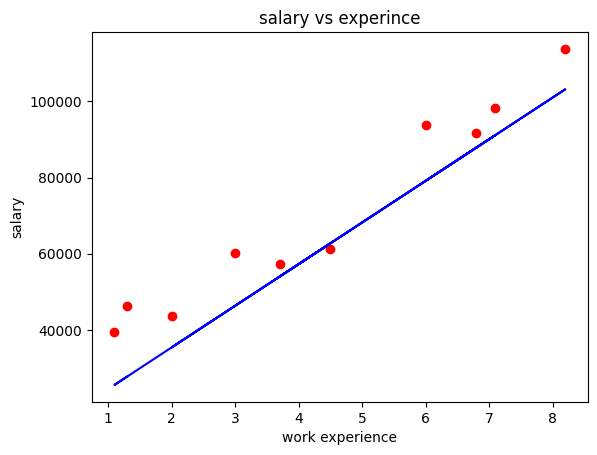

In [120]:
plt.scatter(X_test,Y_test,color = "red")
plt.plot(X_test,test_data_prediction,color = "blue")
plt.xlabel("work experience")
plt.ylabel("salary")
plt.title("salary vs experince")
plt.show